In [1]:
# add ../src directory to path
import sys
sys.path.append('../src')

# imports
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from utils import *
from GPGridSearch import GPGridSearch
import gpytorch
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


# Load data and inject an anomaly

/mnt/lustre/koa/koastore/sadow_group/personal/linneamw/research/dipper_detection/dipper-detection/scripts/../src/utils.py:203: RuntimeWarning: divide by zero encountered in divide
  y_err_binned = 1 / np.sqrt(np.array(var_binned))


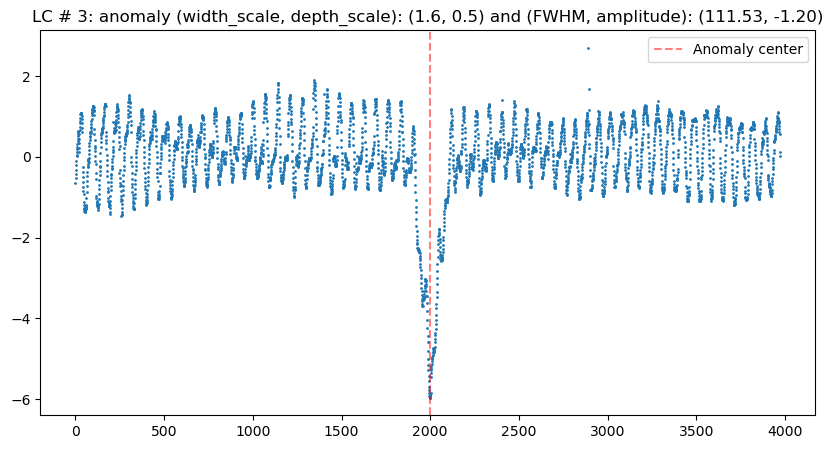

Anomaly locations:
[2000]
43.98958333333333


In [2]:
# Data and anomaly parameters
file_number = 3
shape = "gaussian"
width_scale = 1.6
depth_scale = 0.5
loc = 2000

# Load the data
data_dir = '../data/k2/'
filename = f'k2_{file_number}.fits'
x, y, y_err = load_k2_data(data_dir + filename)

# Scale data to be between 0 and 1
y = (y - np.min(y)) / (np.max(y) - np.min(y))
y_err = y_err / (np.max(y) - np.min(y))

# Inject anomalies
steps, y, anomaly_locs, anomaly_amp, anomaly_fwhm = inject_anomaly(
    y, 
    num_anomalies=1, 
    seed=file_number, 
    shapes=[shape],
    width_scale=width_scale,
    depth_scale=depth_scale,
    anomaly_idx=[loc]
)

# Standardize data to have mean 0 and std of 1
mean_y = np.mean(y)
std_y = np.std(y)
y = (y - mean_y) / std_y
y_err = y_err / std_y

# Plot anomalies
plt.figure(figsize=(10,5))
plt.plot(range(len(x)), y, '.', markersize=2)
for i in range(len(anomaly_locs)):
    plt.axvline(x=anomaly_locs[i], color='r', linestyle='--', alpha=0.5, label='Anomaly center')
plt.legend()
plt.title(f"LC # {file_number}: anomaly (width_scale, depth_scale): ({width_scale}, {depth_scale}) and (FWHM, amplitude): ({anomaly_fwhm:.2f}, {anomaly_amp:.2f})")
plt.show()

# Print anomaly_locs, both indices and x[i]
print("Anomaly locations:")
print(anomaly_locs)
for i in anomaly_locs: print(x[int(i)])

# Perform grid search to find most anomalous interval

In [3]:
# Hyperparameters
which_metric = 'mll'
initial_lengthscale = 0.5
training_iterations = 30
plot = True

gp_detector = GPGridSearch(
    x,
    y,
    y_err,
    which_metric=which_metric,
    initial_lengthscale=initial_lengthscale,
)

best_interval, max_metric = gp_detector.find_anomalous_interval(device=device, training_iterations=training_iterations)

/home/linneamw/sadow_koastore/personal/linneamw/anaconda3/envs/dipper_detect/lib/python3.12/site-packages/gpytorch/likelihoods/noise_models.py:148: NumericalWarning: Very small noise values detected. This will likely lead to numerical instabilities. Rounding small noise values up to 0.0001.
  warnings.warn(
/home/linneamw/sadow_koastore/personal/linneamw/anaconda3/envs/dipper_detect/lib/python3.12/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(


Anomaly interval: 0-23, Metric: -3283.319580078125
Anomaly interval: 0-24, Metric: -3290.83837890625


/home/linneamw/sadow_koastore/personal/linneamw/anaconda3/envs/dipper_detect/lib/python3.12/site-packages/gpytorch/likelihoods/noise_models.py:148: NumericalWarning: Very small noise values detected. This will likely lead to numerical instabilities. Rounding small noise values up to 0.0001.
  warnings.warn(


Anomaly interval: 0-25, Metric: -3293.48046875
Anomaly interval: 0-26, Metric: -3282.1669921875
Anomaly interval: 0-27, Metric: -3290.82666015625
Anomaly interval: 0-28, Metric: -3289.935791015625
Anomaly interval: 0-29, Metric: -3282.8056640625
Anomaly interval: 0-30, Metric: -3289.951416015625
Anomaly interval: 0-31, Metric: -3267.32568359375
Anomaly interval: 0-32, Metric: -3276.35498046875
Anomaly interval: 0-33, Metric: -3280.898681640625
Anomaly interval: 0-34, Metric: -3282.84619140625
Anomaly interval: 0-35, Metric: -3283.666259765625
Anomaly interval: 0-36, Metric: -3288.30322265625
Anomaly interval: 0-37, Metric: -3272.09814453125
Anomaly interval: 0-38, Metric: -3281.641845703125
Anomaly interval: 0-39, Metric: -3266.68408203125
Anomaly interval: 0-40, Metric: -3285.096923828125
Anomaly interval: 0-41, Metric: -3275.398193359375
Anomaly interval: 0-42, Metric: -3269.8359375
Anomaly interval: 0-43, Metric: -3272.7236328125
Anomaly interval: 0-44, Metric: -3275.7705078125
Anom

OutOfMemoryError: CUDA out of memory. Tried to allocate 60.00 MiB. GPU 